# Problem Statement

This dataset is created for prediction of the S&P 500 stock index based on interest rates and employment numbers.

In [1]:
# Importing the Libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the Dataset

df = pd.read_csv('S&P500_Stock_Data.csv')
df.head()

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663


In [3]:
# Get the Descriptive Statistics

df.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764327
max,3.000000,70.000000,3000.000000


In [4]:
# Get the Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
Interest Rates    1000 non-null float64
Employment        1000 non-null float64
S&P 500 Price     1000 non-null float64
dtypes: float64(3)
memory usage: 23.6 KB


### Visualizing the Dataset

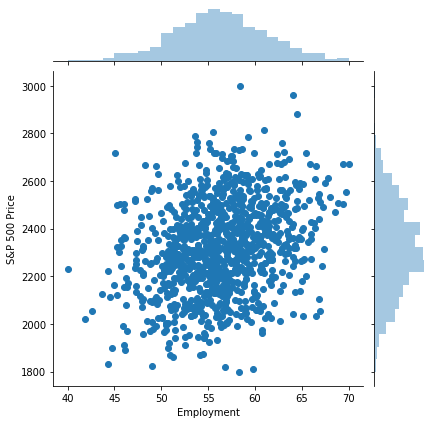

In [6]:
# Compare Employment and Price

sns.jointplot( x = 'Employment', y = 'S&P 500 Price', data = df);

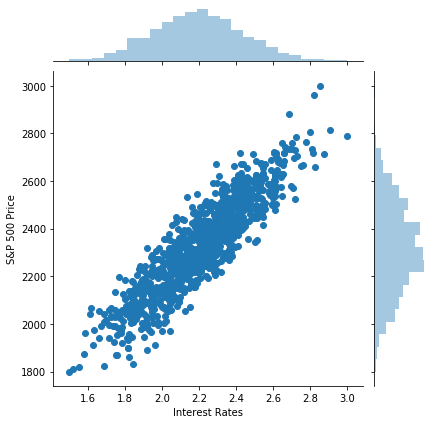

In [8]:
# Compare Employment and Price

sns.jointplot( x = 'Interest Rates', y = 'S&P 500 Price', data = df);

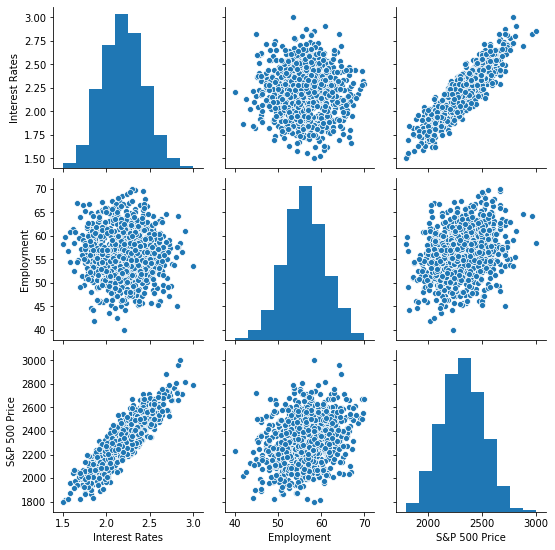

In [9]:
# Get the Pairplot Visualisation of the Data

sns.pairplot(df);

### Model Creation

In [26]:
# Creating Training and Testing Data

X = df[['Interest Rates', 'Employment']]
y = df['S&P 500 Price']

In [27]:
# Import Sklearn and Split the Dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [29]:
# Training the Model

from sklearn.linear_model import LinearRegression

regressor = LinearRegression(fit_intercept = True)

regressor.fit(X_train, y_train)

print('Linear Model Coefficients (m)', regressor.coef_)
print('Linear Model Coefficients (b)', regressor.intercept_)

# Predict the Model

y_predict = regressor.predict(X_test)

Linear Model Coefficients (m) [720.842261    12.26814044]
Linear Model Coefficients (b) 46.109541151566646


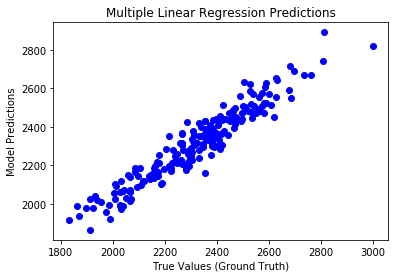

In [31]:
# Visualising Actual and Predicted

plt.scatter(y_test, y_predict, color = 'blue')
plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Multiple Linear Regression Predictions');

In [59]:
# Get the Coefficient of the Model as DataFrame

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Interest Rates,720.842261
Employment,12.268140


### Evaluate the Model Performance using Metrics

In [32]:
# Importing the Metrics

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt # We Import SQRT for RMSE

In [33]:
# Root Mean Squared Error
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))

# Mean Squared Error
MSE = mean_squared_error(y_test, y_predict)

# Mean Absolute Error
MAE = mean_absolute_error(y_test, y_predict)

# R Square
r2 = r2_score(y_test, y_predict)

# Adjusted R Square

k = X_test.shape[1] # No of Columns
n = len(X_test) # No of Data of Test

adj_r2 = 1 - (1 - r2) * ( n - 1 )  /  ( n - k - 1)

# Mean Absolute Percentage Error
MAPE = np.mean( np.abs( (y_test-y_predict) / y_test  )  ) * 100

In [34]:
print("The Evaluation Metrics are shown below:\n")
print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)

The Evaluation Metrics are shown below:

RMSE =  62.343 
MSE = 3886.616947156315 
MAE = 50.2267011676483 
R2 = 0.911272227301493 
Adjusted R2 = 0.9103714377309499 
MAPE = 2.1754692374055953


### Visualising the Results via 3D Graph

In [35]:
from mpl_toolkits.mplot3d import Axes3D

In [37]:
X_surf, y_surf = np.meshgrid( np.linspace( start= df['Interest Rates'].min(), stop= df['Interest Rates'].max(), num=100), \
                              np.linspace( start= df['Employment'].min(), stop=  df['Employment'].max() , num=100))

# meshgrid( x , y ) returns 2-D grid coordinates based on the coordinates contained in vectors x and y

In [39]:
print("The Shape of meshed X Surface is {} and y surface is {}".format(X_surf.shape, y_surf.shape))

The Shape of meshed X Surface is (100, 100) and y surface is (100, 100)


In [47]:
type(x_surf)

numpy.ndarray

In [52]:
# Flatten 100*100 with ravel and create a Dataset

onlyX = pd.DataFrame( {'Interest Rates': x_surf.ravel(), 'Employment':y_surf.ravel()} ) 

onlyX.shape

(10000, 2)

In [50]:
# Sample for Ravel

newdf = np.random.randint(0,9,size=(3, 3))
newdf

array([[5, 7, 0],
       [0, 8, 1],
       [1, 7, 6]])

In [51]:
newdf.ravel()

array([5, 7, 0, 0, 8, 1, 1, 7, 6])

In [53]:
# Predict Y w.r.t Meshed x

fittedY = regressor.predict(onlyX)
fittedY.shape

(10000,)

In [55]:
# Convert the Shape of fittedY from 10000 to 100 * 100 using reshape to bring it effectively into plot

# fittedY = fittedY.reshape(x_surf.shape)
fittedY = fittedY.reshape((100,100))
fittedY.shape

(100, 100)

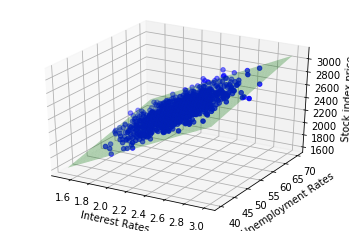

In [57]:
# Plot the Figure with Projections

fig = plt.figure()
# 111 means 1 image only
ax = fig.add_subplot(111, projection = '3d')

# Plots the Datapoints only
ax.scatter( df['Interest Rates'], df['Employment'] , df['S&P 500 Price'] , c = 'blue', marker ='o'  )

# Creates the Surface with Meshed data (For 3D Projections)
ax.plot_surface(x_surf, y_surf, fittedY, color = 'green', alpha = 0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('Stock index price');

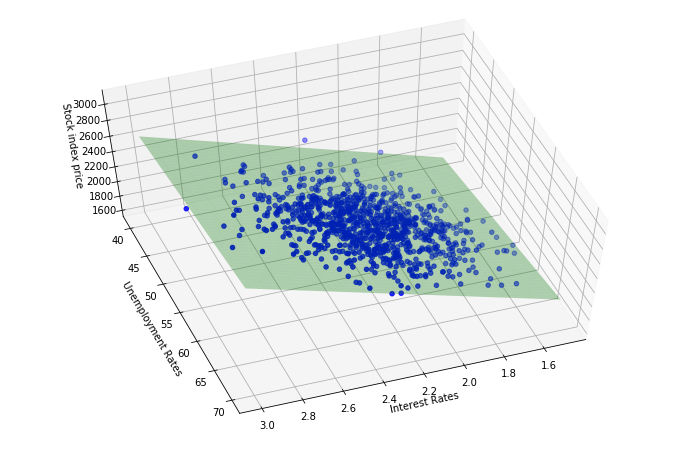

In [58]:
# Alter the Projection of the Visual

# Plot the Figure with Projections

fig = plt.figure(figsize= (12, 8))
# 111 means 1 image only
ax = fig.add_subplot(111, projection = '3d')

# Plots the Datapoints only
ax.scatter( df['Interest Rates'], df['Employment'] , df['S&P 500 Price'] , c = 'blue', marker ='o'  )

# Creates the Surface with Meshed data (For 3D Projections)
ax.plot_surface(x_surf, y_surf, fittedY, color = 'green', alpha = 0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('Stock index price');

# Setting elevation and azimut to Rotate the Data
ax.view_init(60, 70)
plt.show()